# Statistical evaluation 
Aligned Rank Transform (ART): 
http://depts.washington.edu/ilab/proj/art/index.html

In [1]:
# load the ARTool library
library(ARTool)
# load the emmeans library
library(emmeans)

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 


# Co-presence

In [2]:
# read the data table into variable 'df'
df <- read.csv("VR_Participants - Co-Presence.csv")
df

PID,Task,condition,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
11,1,real,1,1,2,-2,1,1,1,...,3,1,0,2,3,2,-2,3,0,1
11,2,none,1,1,1,-1,1,0,1,...,1,1,0,0,2,2,-2,2,0,1
11,3,fake,0,1,-1,1,1,1,1,...,0,0,-1,0,2,1,-2,2,-2,2
12,1,real,1,1,2,1,0,1,2,...,2,2,2,2,3,1,-3,1,1,1
12,2,none,-2,-1,-1,2,0,0,-2,...,-2,-1,-2,0,-1,-1,-2,1,-1,2
12,3,fake,1,1,1,-2,1,1,1,...,2,2,2,2,3,2,-3,1,1,0
21,1,none,-2,-3,-3,-2,-2,-2,-3,...,-2,-2,-3,-2,0,0,1,3,-3,3
21,2,fake,-2,-2,-2,-1,-3,-3,-2,...,-3,-3,-2,-3,-1,-1,-2,3,-3,2
21,3,real,1,1,1,0,-2,-2,-2,...,-1,-1,-2,0,1,1,0,3,-2,2


### check if normally distributed

[1] "PID"
[1] "Task"
[1] "condition"
[1] "X1"
[1] "X2"


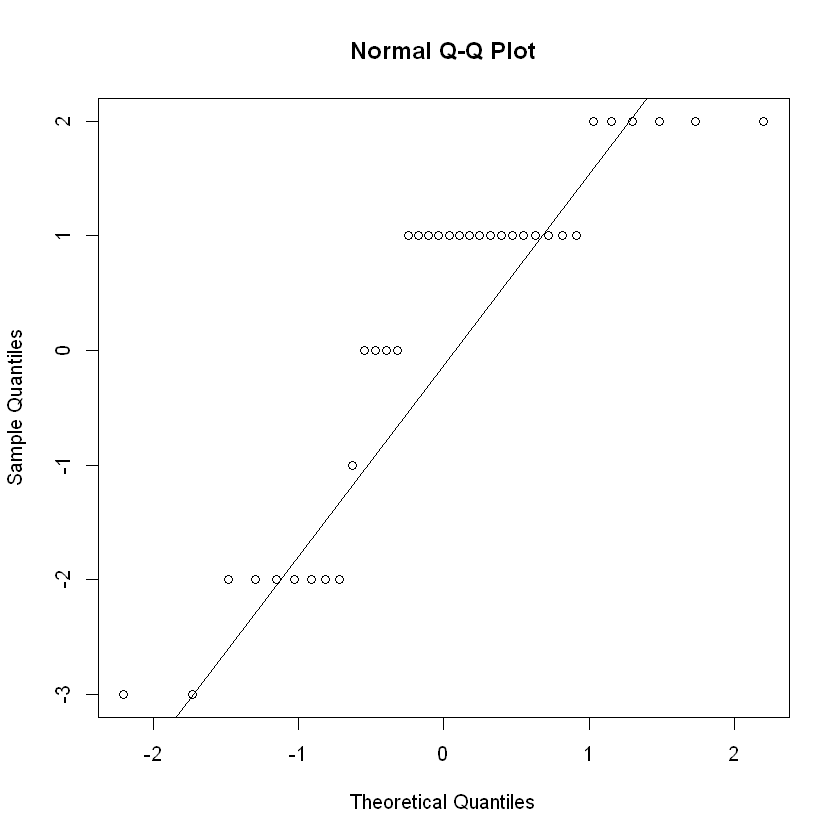

[1] "X3"


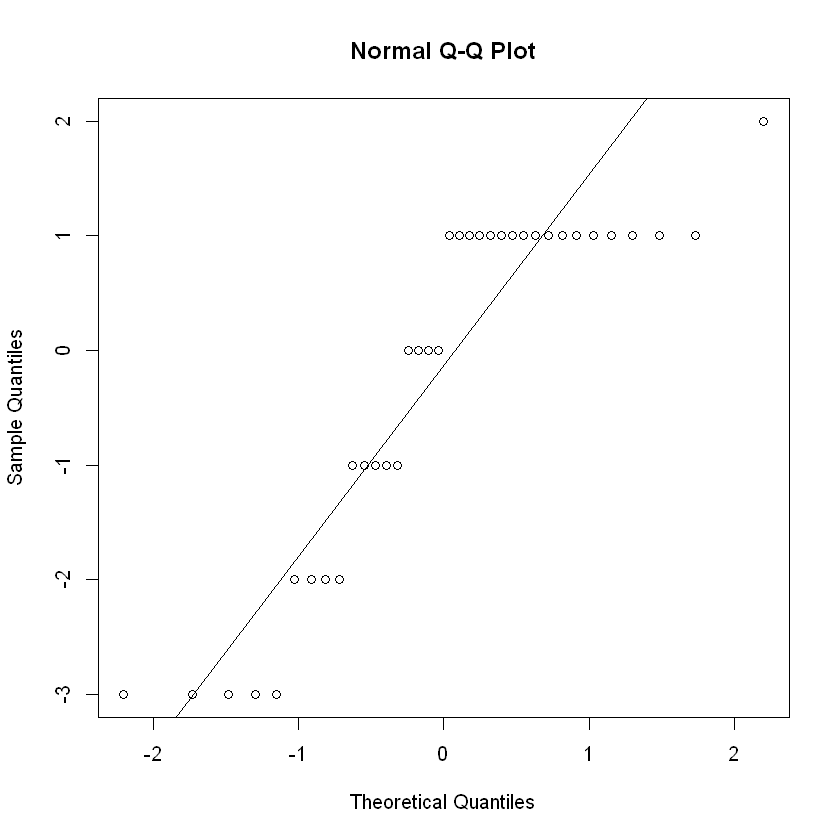

[1] "X4"


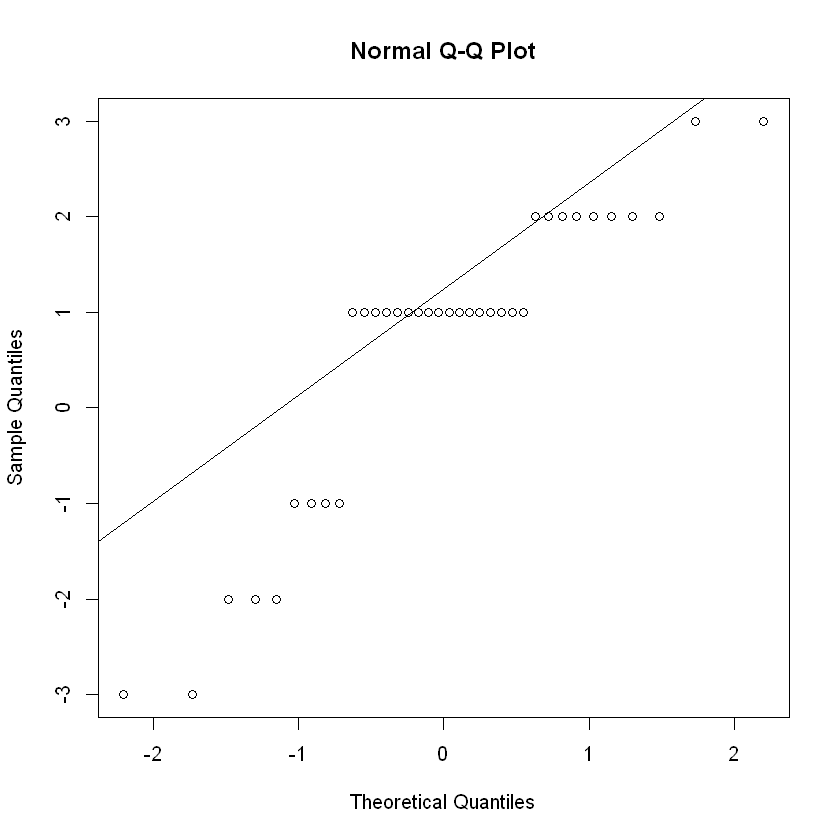

[1] "X5"


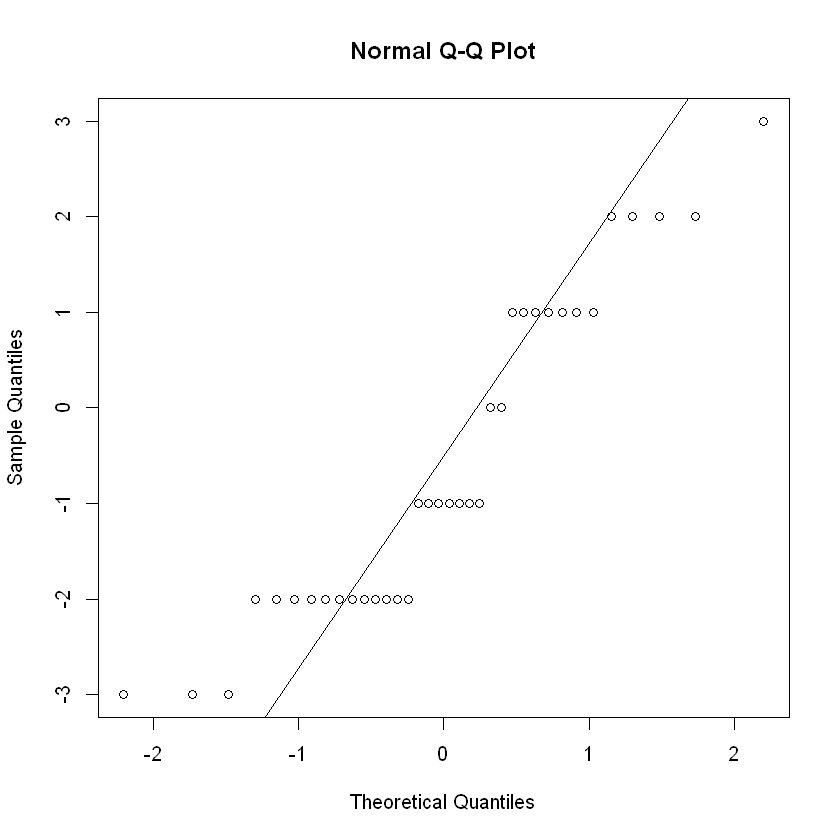

[1] "X6"


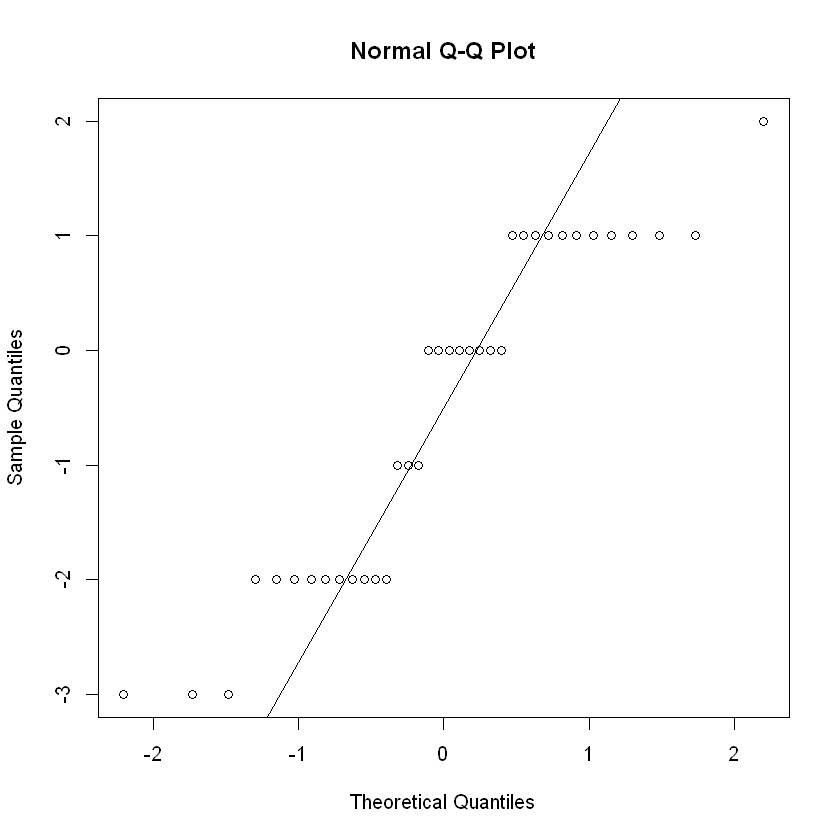

[1] "X7"


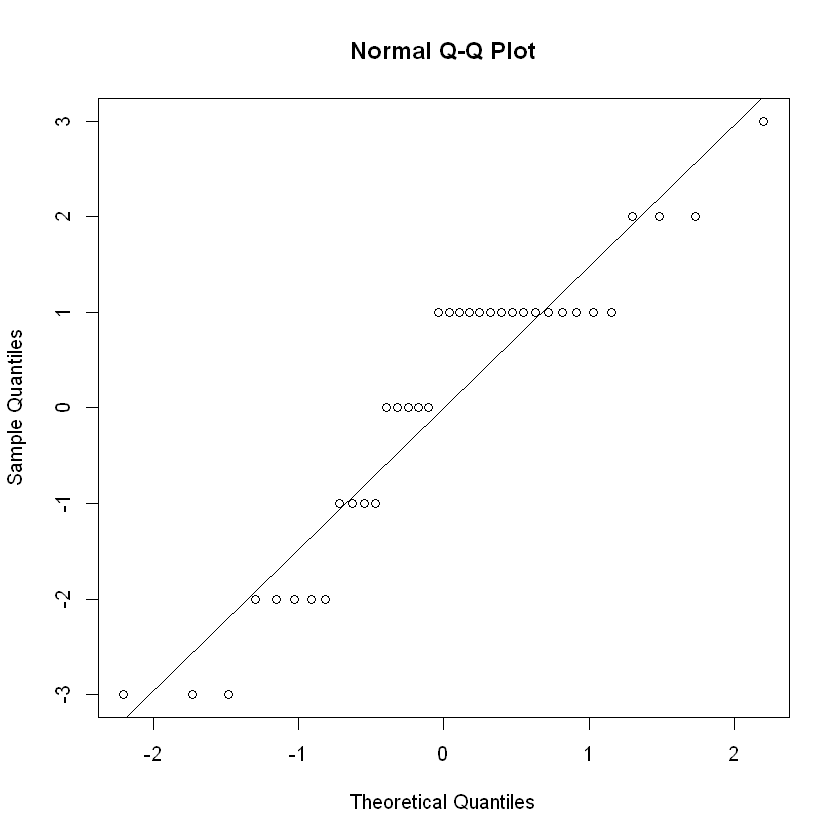

[1] "X8"


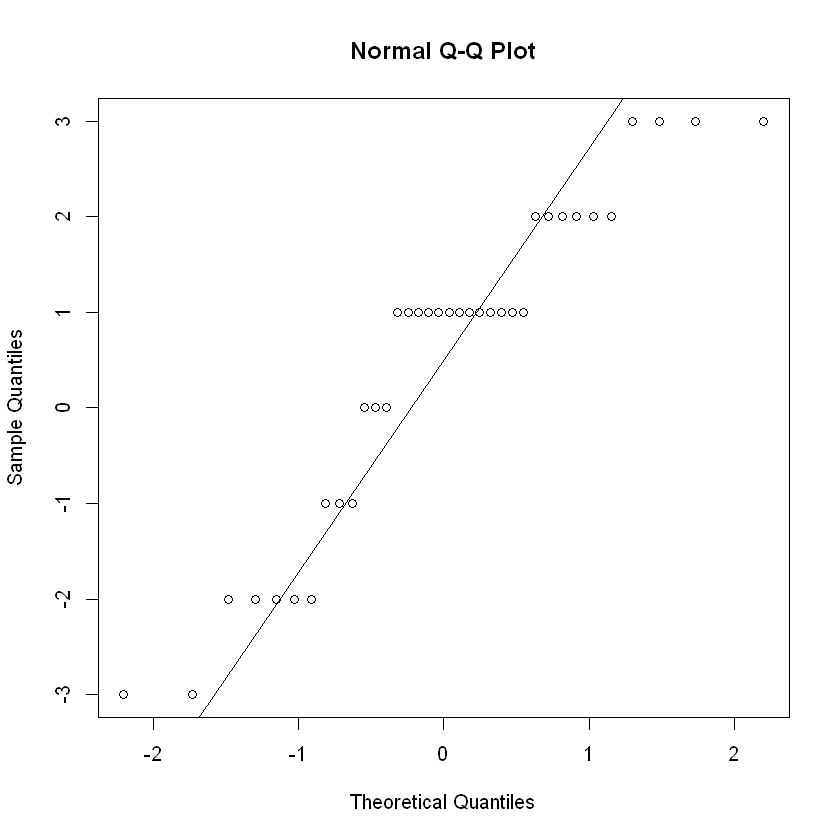

[1] "X9"


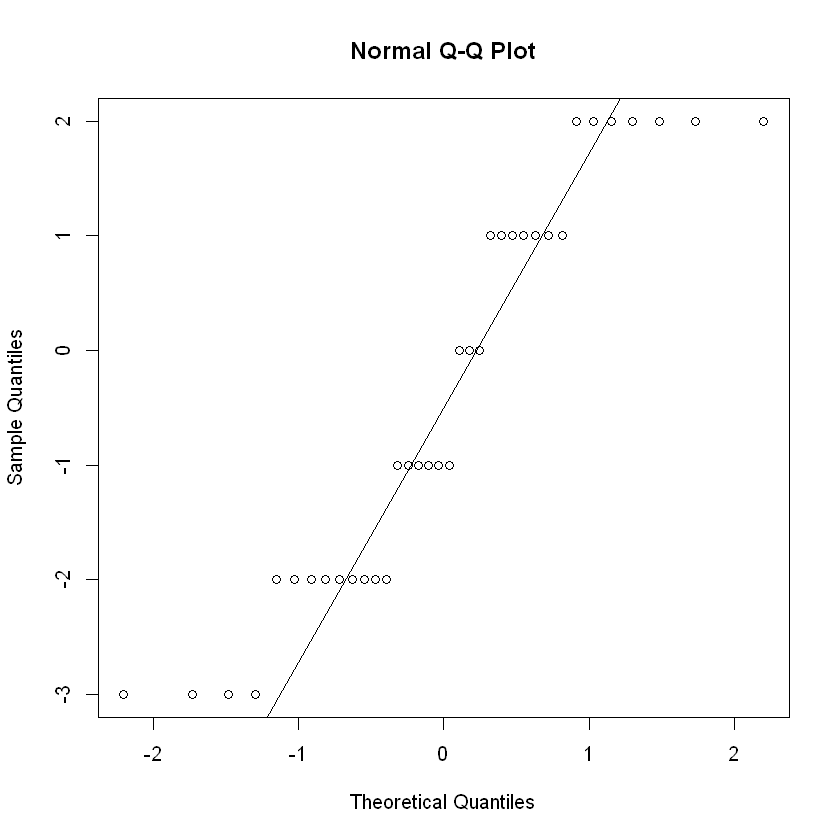

[1] "X10"


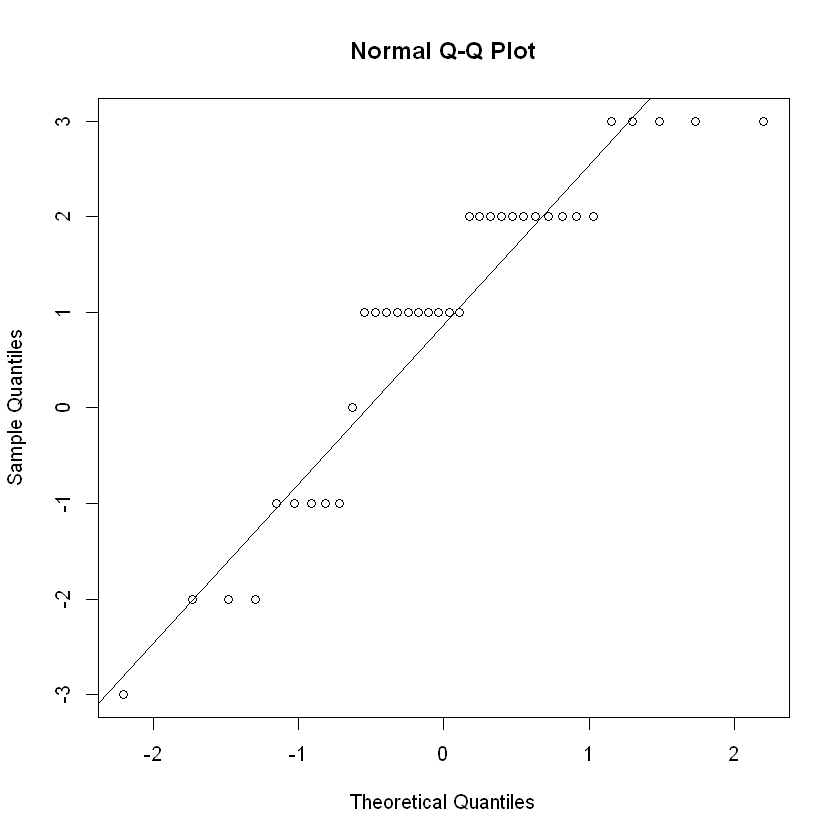

[1] "X11"


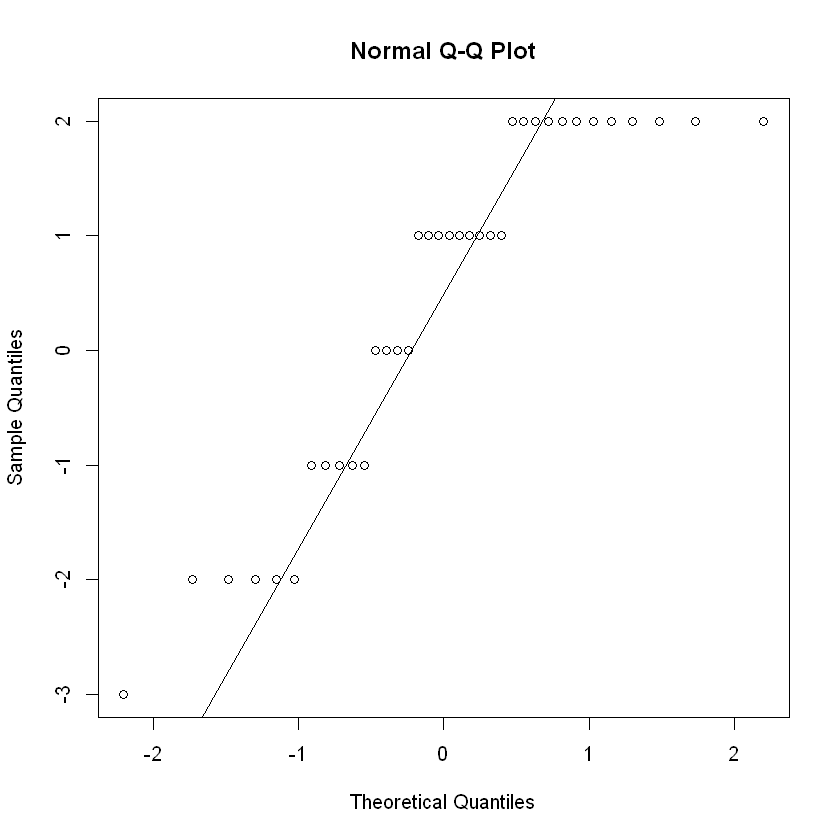

[1] "X12"


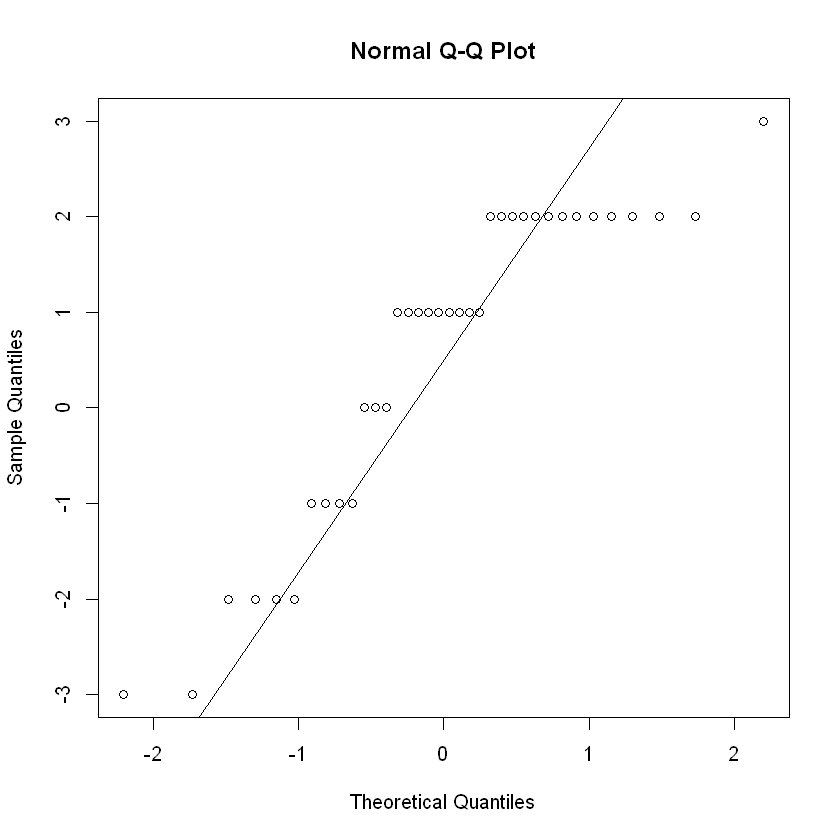

[1] "X13"


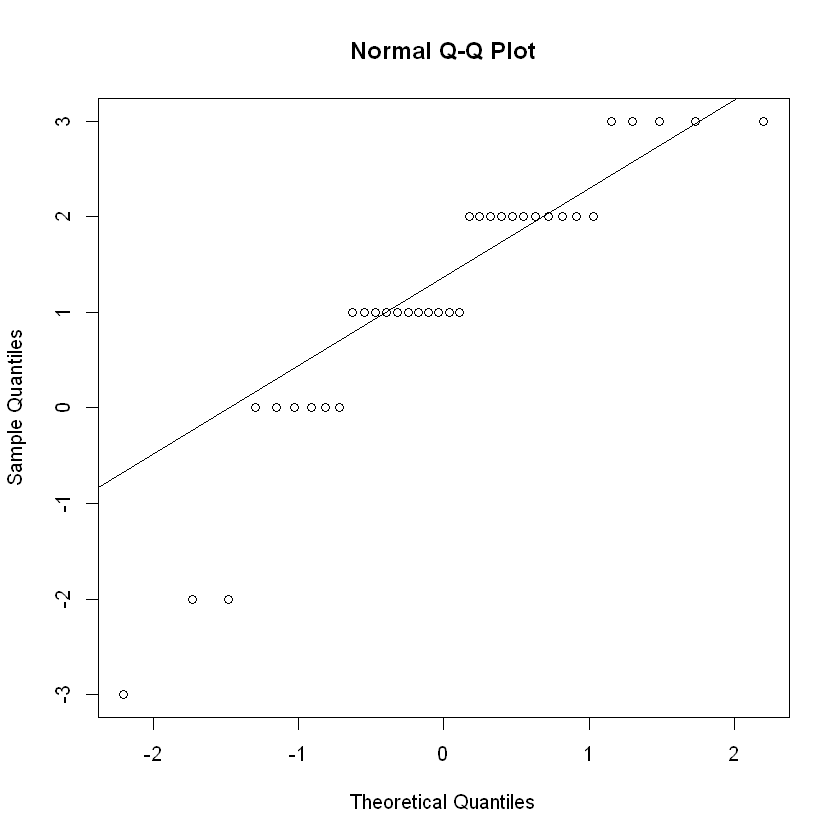

[1] "X14"


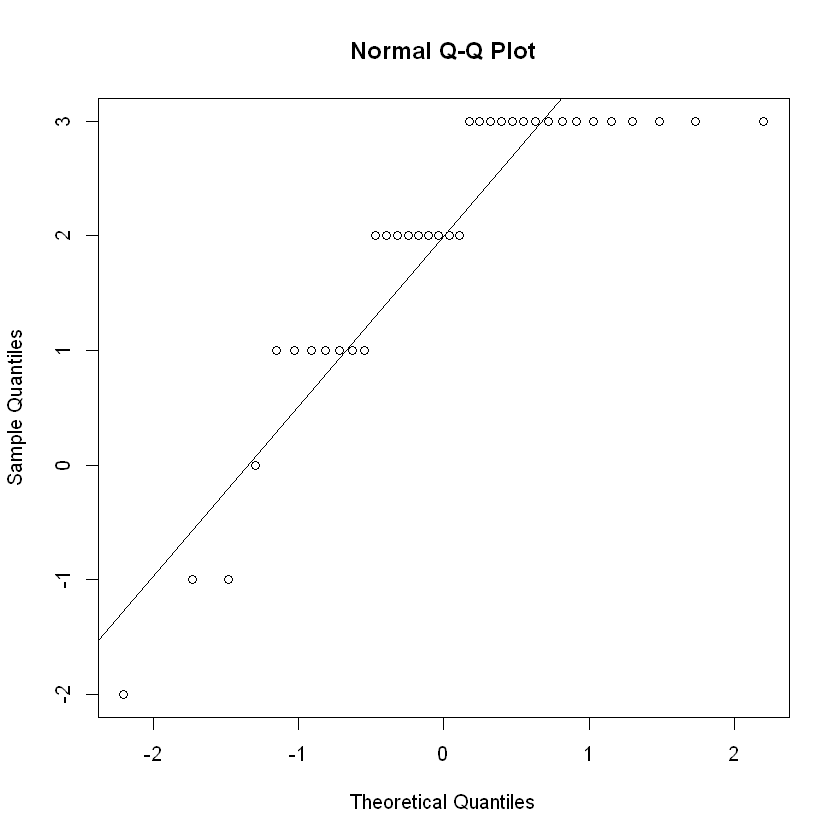

[1] "X15"


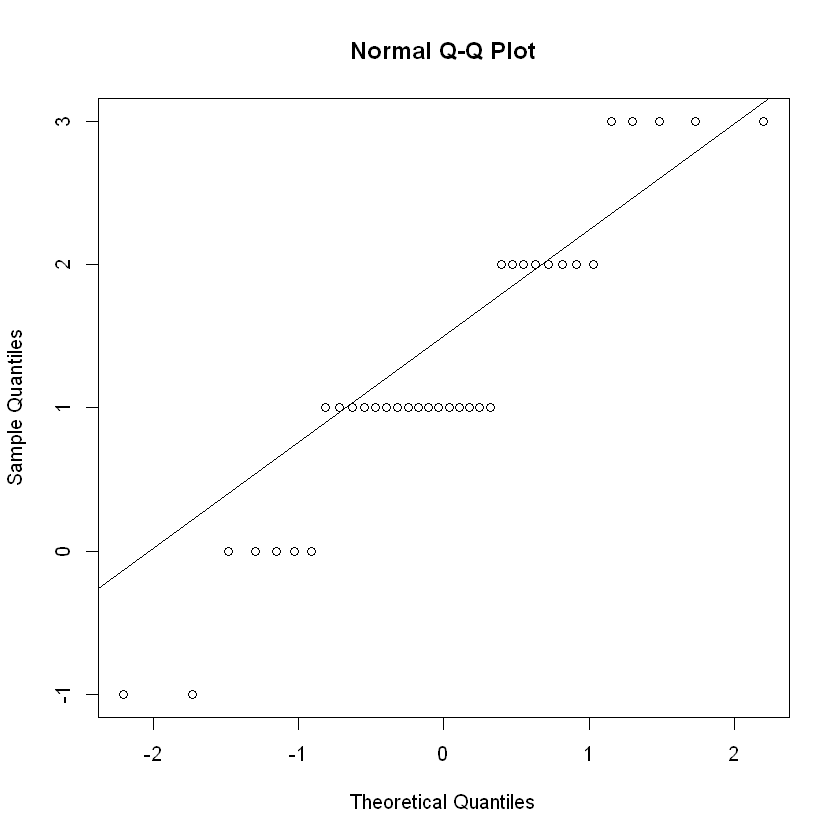

[1] "X16"


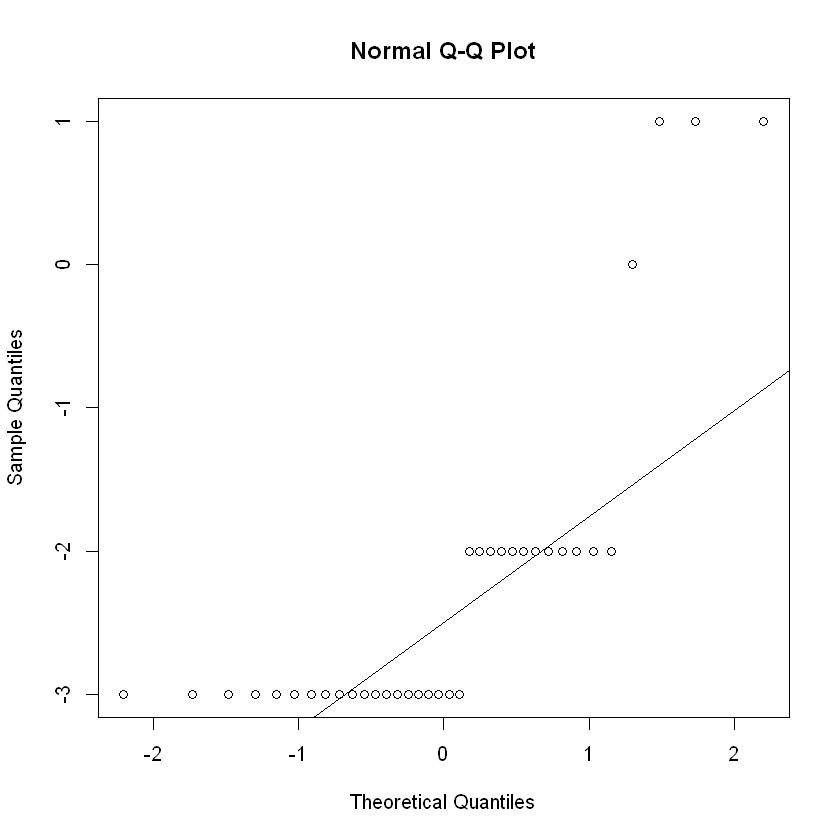

[1] "X17"


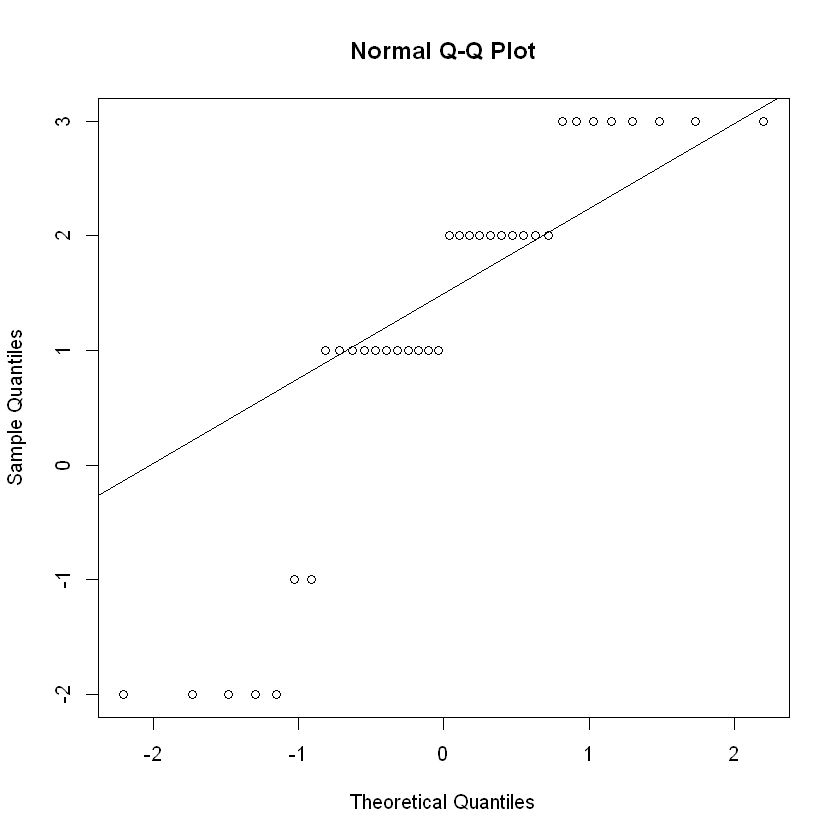

[1] "X18"


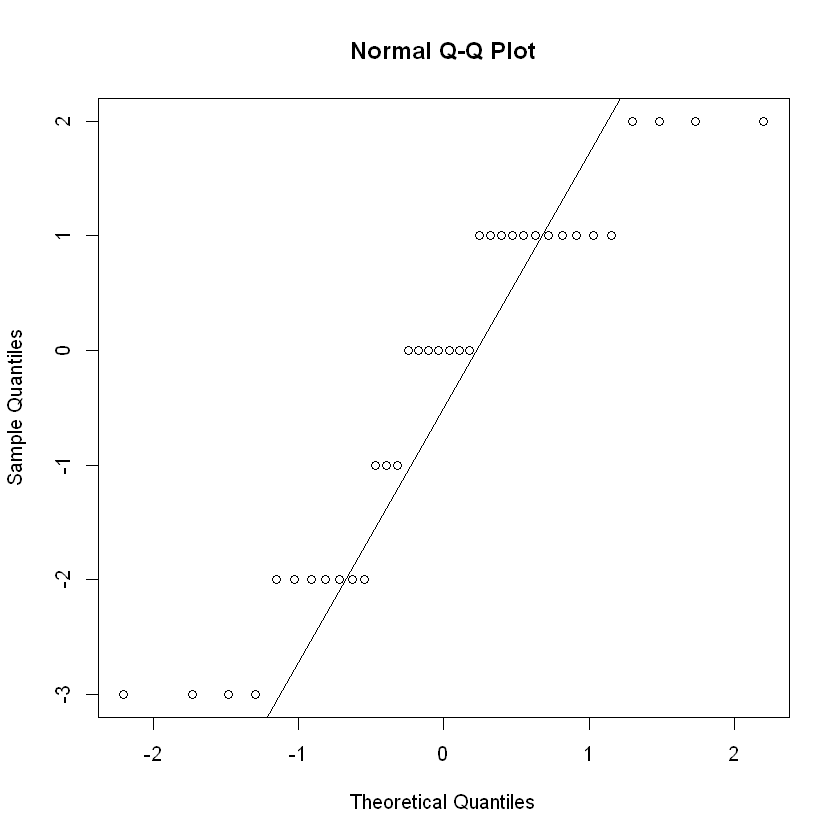

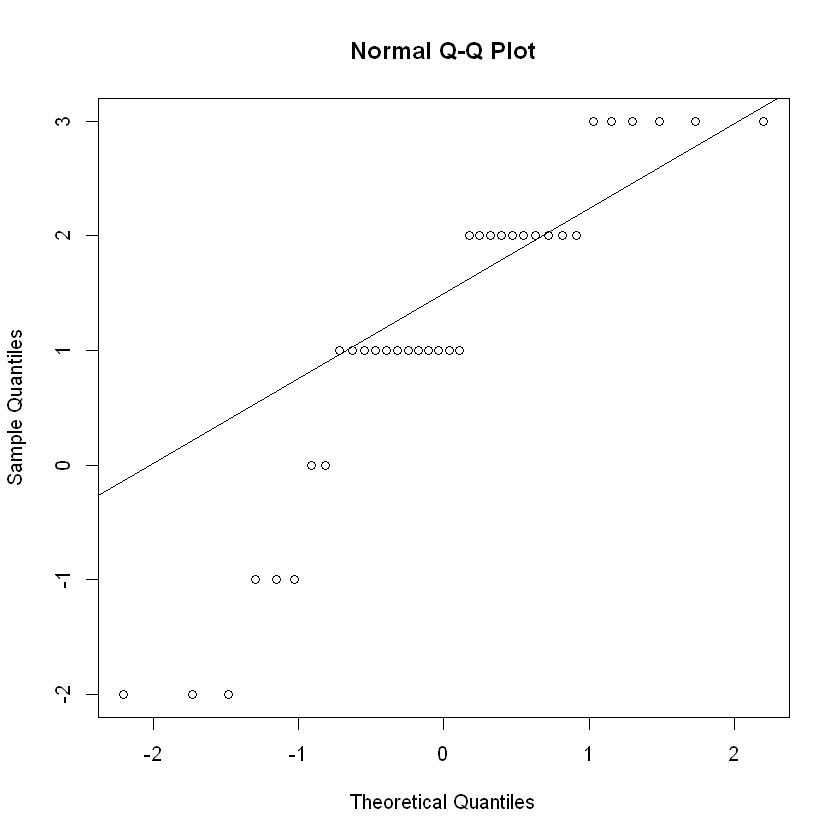

In [3]:
for (i in colnames(df)){
    #print(df[[i]])
    print(i)
    if(i == "PID" || i ==  "Task" || i == "condition")
        next
    else{
        qqnorm(df[[i]])
        qqline(df[[i]])
    }
        
}

## ANOVA

In [5]:
## perform the ART procedure on 'df'
# assume 'Y' is the name of the response column (dependent variable)
# assume 'X1' is the name of the first factor column (independent variable 1)
# assume 'X2' is the name of the second factor column (independent variable 2)
# assume 'S' is the name of the subjects column
# m = art(Y ~ X1 * X2 + (1|S), data=df) # uses a linear mixed model

for (i in colnames(df)){
    #print(df[[i]])
    print(i)
    if(i == "PID" || i ==  "Task" || i == "condition")
        next
    else{
        m = art(df[[i]] ~ condition  + (1|PID), data=df) 
        
        print(anova(m))
    }
      
}

[1] "PID"
[1] "Task"
[1] "condition"
[1] "X1"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(df[[i]])

                 F Df Df.res  Pr(>F)  
1 condition 1.5622  2     22 0.23207  
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
[1] "X2"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(df[[i]])

                 F Df Df.res   Pr(>F)  
1 condition 3.9849  2     22 0.033352 *
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
[1] "X3"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(df[[i]])

                F Df Df.res  Pr(>F)  
1 condition 2.374  2   

## Post hoc: pairwise comparisons

In [66]:
# m is the model returned by the call to art() above
# emmeans reports p-values Tukey-corrected for multiple comparisons
# assume levels of 'X1' are 'a', 'b', and 'c'
# emmeans(artlm(m, "X1"), pairwise ~ X1)


In [64]:
for(i in c("X2", "X8", "X12", "X13", "X15", "X18")){
    print(i)
    m = art(df[[i]] ~ condition  + (1|PID), data=df) 
    print(emmeans(artlm(m, "condition"), pairwise ~ condition))  
    print("##################################################")
}

[1] "X2"
$emmeans
 condition emmean   SE   df lower.CL upper.CL
 fake        18.4 2.85 16.4    12.34     24.4
 none        15.5 2.85 16.4     9.47     21.5
 real        21.6 2.85 16.4    15.59     27.7

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast    estimate   SE df t.ratio p.value
 fake - none     2.88 2.17 22  1.324  0.3971 
 fake - real    -3.25 2.17 22 -1.497  0.3116 
 none - real    -6.12 2.17 22 -2.821  0.0259 

P value adjustment: tukey method for comparing a family of 3 estimates 

[1] "##################################################"
[1] "X8"
$emmeans
 condition emmean   SE   df lower.CL upper.CL
 fake        14.1 2.65 29.8     8.71     19.5
 none        15.6 2.65 29.8    10.21     21.0
 real        25.8 2.65 29.8    20.33     31.2

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast    estimate   SE df t.ratio p.value
 fake - none     -1.5 3.28 22 -0.457  0.8919 
 fake - real    -11.6

# Presence

In [19]:
df_presence <- read.csv("VR_Participants - Presence.csv")
df_presence

PID,Task,condition,aware.of.environment,attention.real.environment,present.in.vr,hands.located.in.vr
<int>,<int>,<fct>,<int>,<int>,<int>,<int>
11,1,real,1,0,1,-1
11,2,none,-1,1,1,-1
11,3,fake,-1,1,1,-2
12,1,real,-1,1,2,1
12,2,none,-1,1,2,2
12,3,fake,0,0,2,2
21,1,none,-2,-1,0,0
21,2,fake,1,-1,-1,-3
21,3,real,0,-1,1,-2


### check if data normally distributed

[1] "PID"
[1] "Task"
[1] "condition"
[1] "aware.of.environment"
[1] "attention.real.environment"


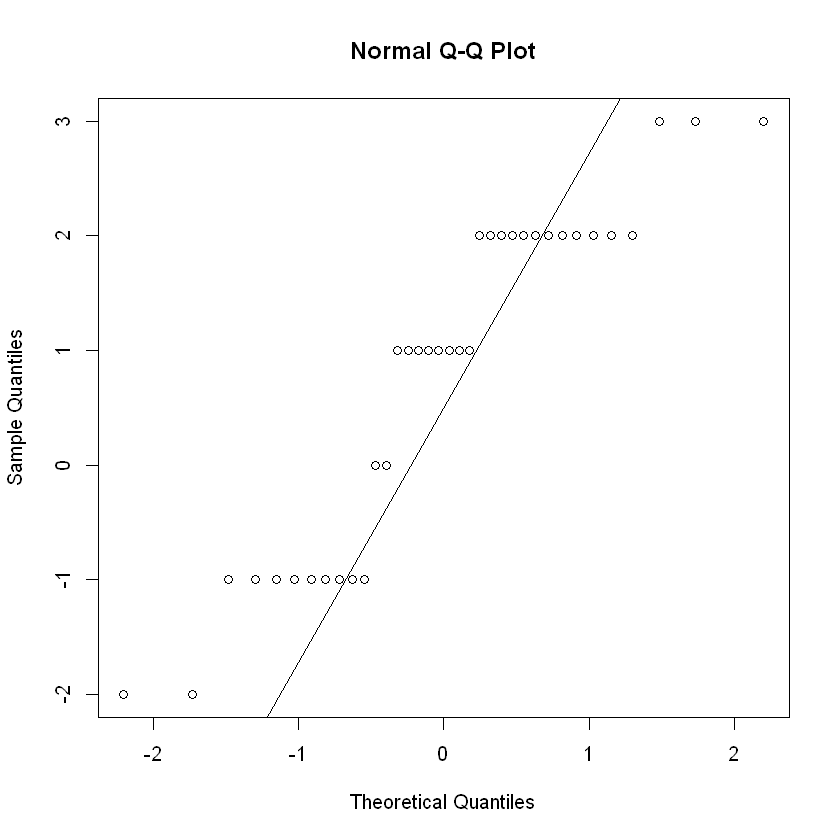

[1] "present.in.vr"


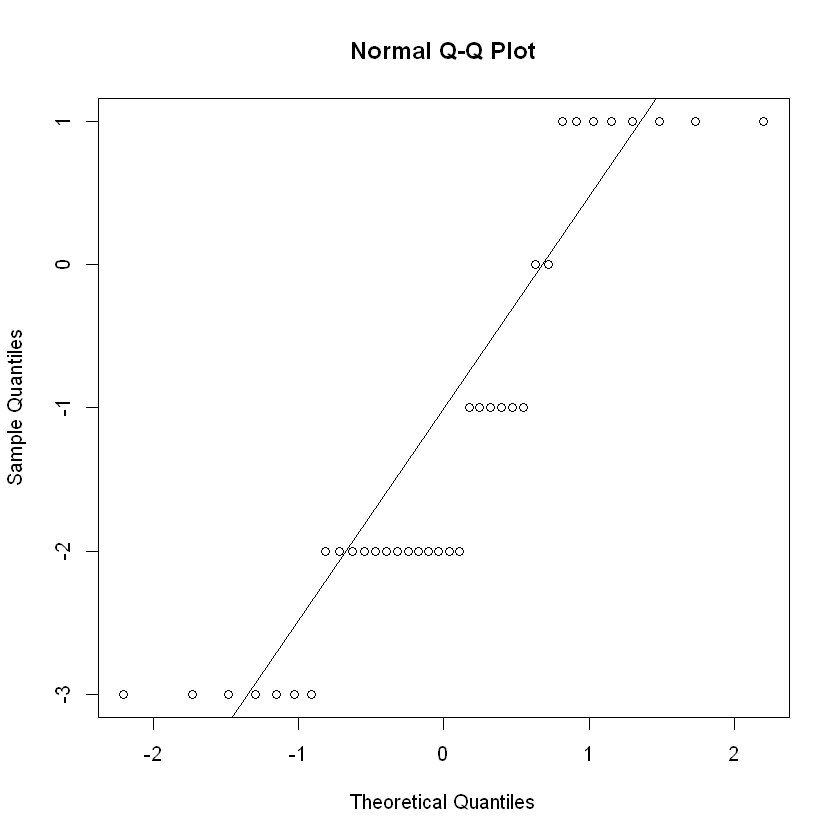

[1] "hands.located.in.vr"


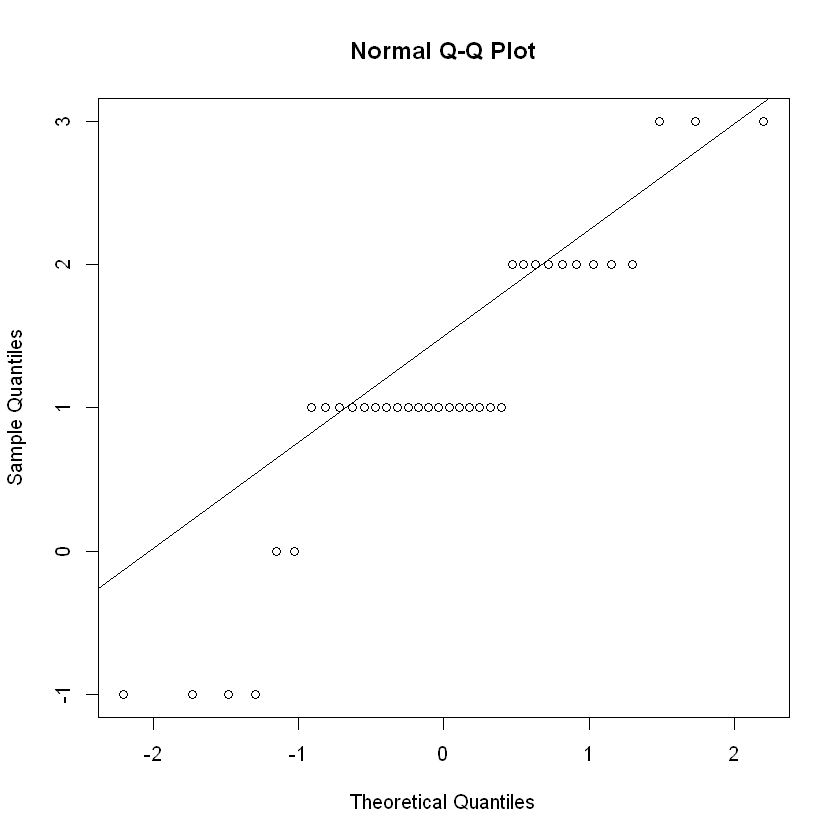

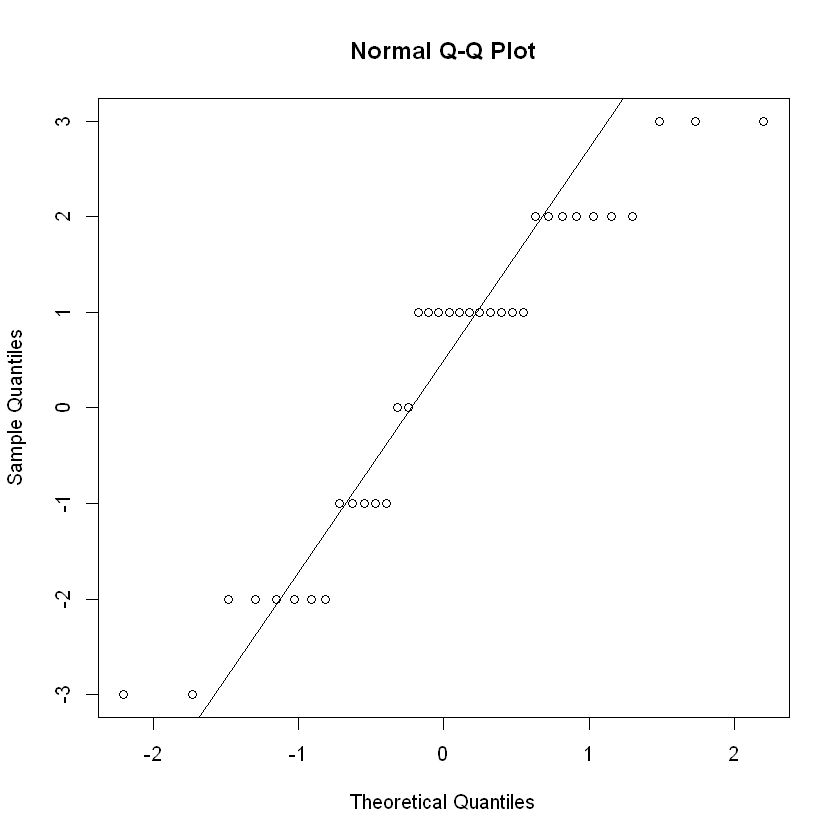

In [20]:
for (i in colnames(df_presence)){
    print(i)
    if(i == "PID" || i ==  "Task" || i == "condition")
        next
    else{
        qqnorm(df_presence[[i]])
        qqline(df_presence[[i]])
    }    
}

## ANOVA

In [81]:
for (i in colnames(df_presence)){
    print(i)
    if(i == "PID" || i ==  "Task" || i == "condition")
        next
    else{
        m = art(df_presence[[i]] ~ condition  + (1|PID), data=df_presence) 
        print(anova(m))
        print("#######################################################################")
    }    
}

[1] "PID"
[1] "Task"
[1] "condition"
[1] "X1"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(df_presence[[i]])

                 F Df Df.res  Pr(>F)  
1 condition 1.4648  2     22 0.25281  
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
[1] "#######################################################################"
[1] "X2"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Deviance Table (Type III Wald F tests with Kenward-Roger df) 
Model: Mixed Effects (lmer)
Response: art(df_presence[[i]])

                 F Df Df.res  Pr(>F)  
1 condition 1.0878  2     22 0.35441  
---
Signif. codes:   0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
[1] "#######################################################################"
[1] "X3"
Analysis of Variance of Aligned Rank Transformed Data

Table Type: Analysis of Dev

# Euclidean distance

In [6]:
df_distance <- read.csv("distance.csv")
df_distance

X,PID,condition,movement
<int>,<int>,<int>,<dbl>
0,11,1,140.30826
1,11,2,89.39684
2,11,3,82.07991
3,12,1,108.94970
4,12,2,140.27682
5,12,3,120.11318
6,21,1,98.84236
7,21,2,65.58931
8,21,3,70.99587


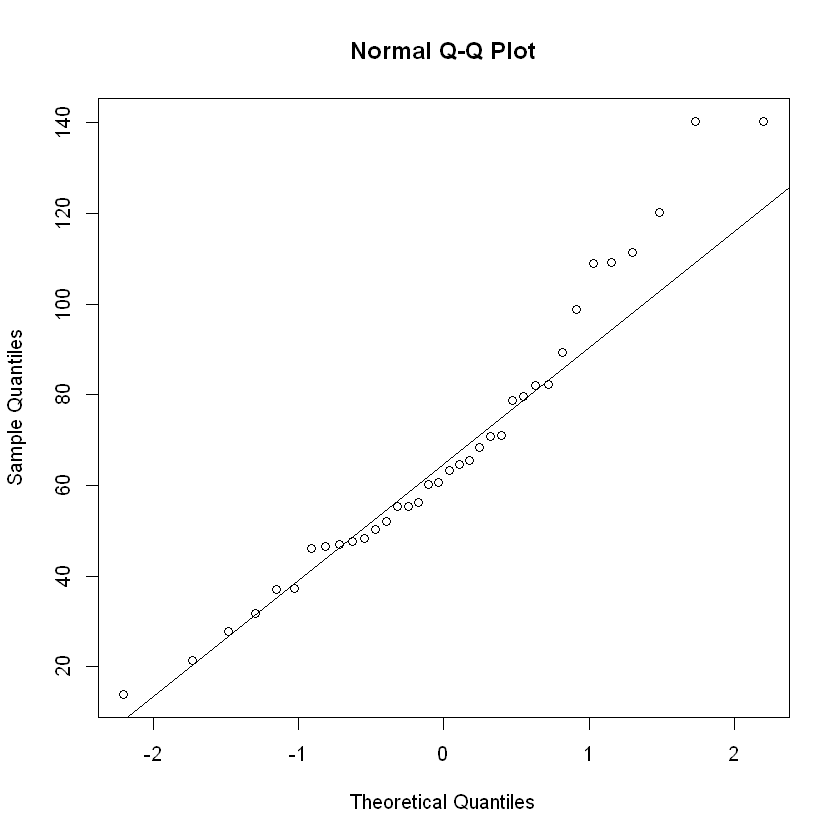

In [7]:
qqnorm(df_distance$movement)
qqline(df_distance$movement)

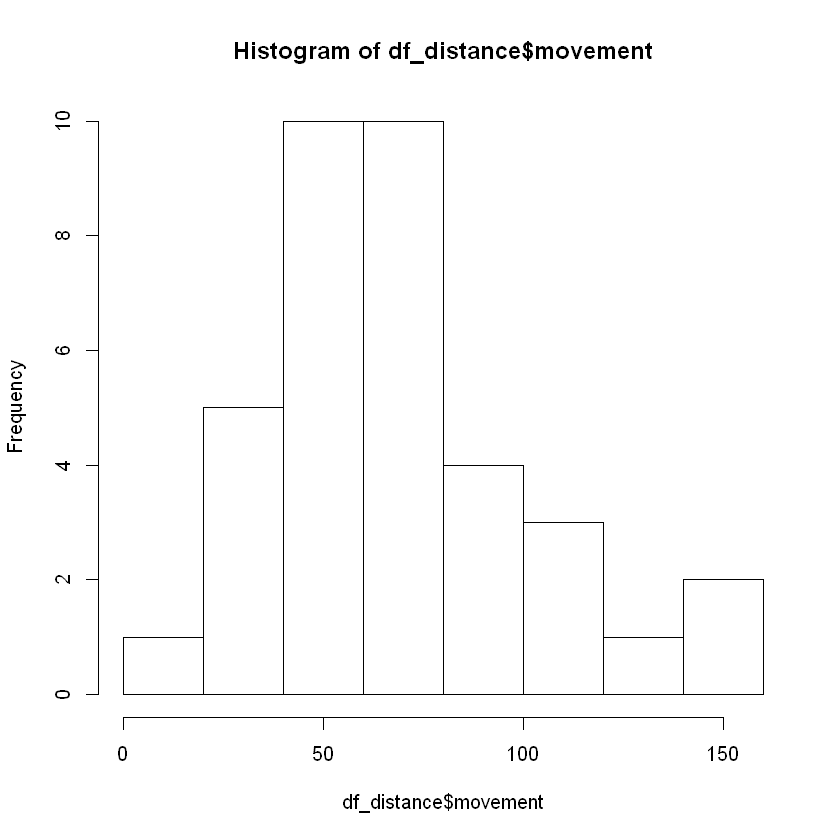

In [11]:
hist(df_distance$movement)

In [16]:
dist.aov <- aov(df_distance$movement ~ df_distance$condition, data = df_distance)
# Summary of the analysis
summary(dist.aov)

                      Df Sum Sq Mean Sq F value Pr(>F)
df_distance$condition  1     83    82.8   0.084  0.774
Residuals             34  33696   991.1               